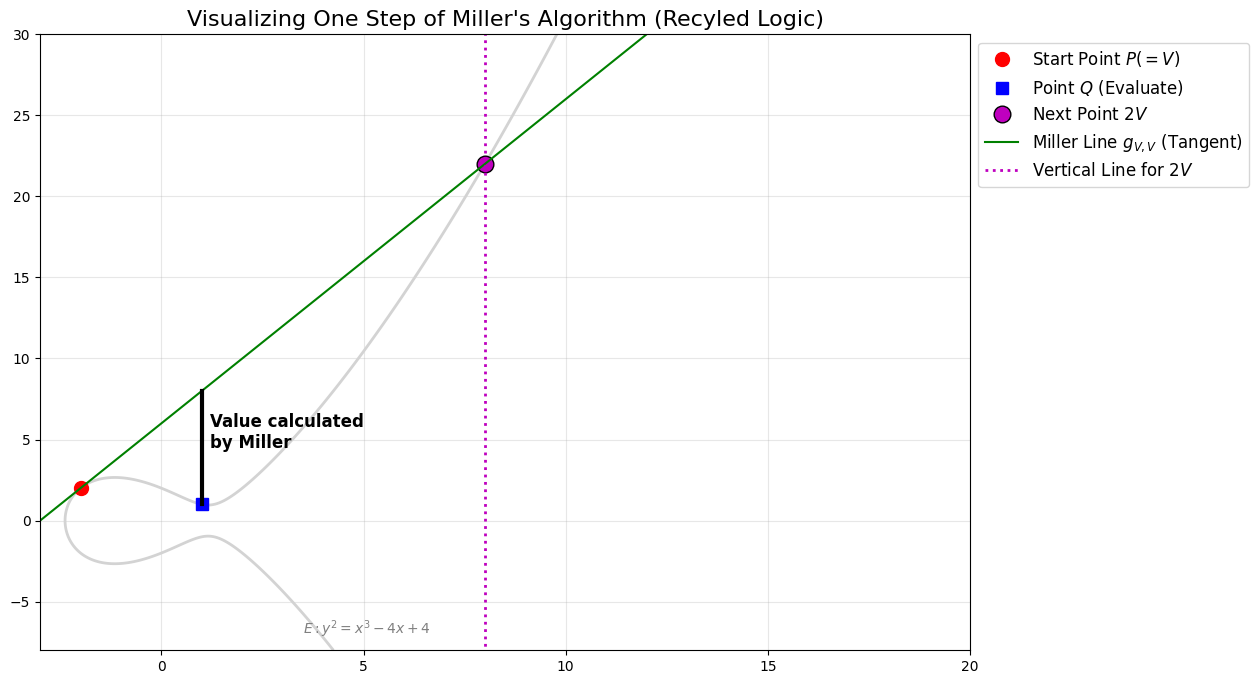

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 아까 작성한 Point 클래스 재활용
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


# 타원곡선 설정 (실수 영역: y^2 = x^3 - 4x + 4)
a, b = -4, 4

def get_y(x):
    """x값에 대응하는 양수 y값을 반환"""
    val = x**3 + a*x + b
    return np.sqrt(val) if val >=0 else 0

# 2.  타원곡선 연산 로직 재활용 (Mod p만 제거)
def ecc_double(P):
    # 기울기(lambda) = (3x^2 + a) / 2y
    lam = (3 * P.x**2 + a) / (2 * P.y)
    x3 = lam **2 - 2 * P.x
    y3_neg = lam * (P.x - x3) - P.y
    return Point(x3, -y3_neg), lam # 기울기도 같이 반환 (직선 그리기 위해)


def ecc_add(P, Q):
    # 기울기(lambda) = (y2 - y1) / (x2 - x1)
    lam = (Q.y - P.y) / (Q.x - P.x)
    x3 = lam**2 - P.x - Q.x
    y3 = lam * (P.x -x3) - P.y
    return Point(x3, y3), lam


# 3. 시각화 실행
def visualize_miller_step():
    # 그래프 기본 설정
    x_range = np.linspace(-3, 20, 500)
    y_range = np.linspace(-8, 30, 500)
    X, Y = np.meshgrid(x_range, y_range)
    Z = Y **2 - (X **3 + a*X +b)

    plt.figure(figsize=(12, 8))
    plt.contour(X, Y, Z, levels=[0], colors='lightgray', linewidths=2)
    plt.text(3.5, -7, '$E: y^2 = x^3 - 4x + 4$', color='gray')

    # 시작점 P와 평가점 Q 설정
    P = Point(-2.0, 2.0) # 시작점
    Q = Point(1.0, 1.0) # 평가할 점 (위치는 예시)

    # --- 밀러 알고리즘의 "Double" 단계 시각화 ---
    # V = P 에서 시작
    V = P
    # Step 1: V를 두 배(double) 함 (2V 계산)
    V_next, slope = ecc_double(V)

    # [시각화 1] 점들 찍기
    plt.plot(P.x, P.y, 'ro', markersize=10, label='Start Point $P (=V)$')
    plt.plot(Q.x, Q.y, 'bs', markersize=8, label='Point $Q$ (Evaluate)')
    plt.plot(V_next.x, V_next.y, 'mo', markersize=12, markeredgecolor='k', label='Next Point $2V$')


    # [시각화 2] 밀러 라인 (Tangent Line) 그리기
    # 식: y = slope * (x - V.x) + V.y
    x_line = np.linspace(-3, 100, 100)
    y_line = slope * (x_line - V.x) + V.y
    plt.plot(x_line, y_line, 'g-', linewidth=1.5, label='Miller Line $g_{V,V}$ (Tangent)')

    # [시각화 3] 분모 라인 (Vertical Line) 그리기
    # 2V를 지나는 수직선
    plt.vlines(V_next.x, -10, 100, colors='m', linestyle=':', linewidth=2, label='Vertical Line for $2V$')
    val_at_Q = slope * (Q.x - V.x) + V.y
    plt.plot([Q.x, Q.x], [Q.y, val_at_Q], 'k-', linewidth=3)
    plt.text(Q.x + 0.2, (Q.y + val_at_Q)/2, 'Value calculated\nby Miller', fontsize=12, fontweight='bold')

    
    plt.title("Visualizing One Step of Miller's Algorithm (Recyled Logic)", fontsize=16)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axis([-3, 20, -8, 30])
    plt.show()
    plt.tight_layout() # 레이아웃 조정

# 실행

visualize_miller_step()
